### Analyte Classification using k-nn
#### Edgar Acuna 
#### July 2020

In [37]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the data

In [38]:
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)
ys=pd.read_csv("c://onr2020/substrateIDs.csv",header=None)

In [39]:
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
dfset1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.041418,0.041621,0.042198,0.042688,0.042924,0.042274,0.042542,0.042663,0.042715,0.042664,...,0.053219,0.053131,0.053091,0.053140,0.053249,0.053325,0.053364,0.053356,0.053500,0.055986
1,0.694710,0.695840,0.697180,0.706530,0.703970,0.709130,0.711480,0.711330,0.712370,0.712980,...,0.754260,0.751040,0.753630,0.754490,0.752980,0.755760,0.752910,0.755320,0.753030,0.753230
2,0.048978,0.048432,0.047685,0.047086,0.046811,0.046752,0.046624,0.046443,0.046241,0.045999,...,0.260320,0.259590,0.258910,0.258210,0.257440,0.256580,0.255700,0.254800,0.254160,0.257110
3,0.039762,0.039495,0.038982,0.038339,0.037769,0.037301,0.036799,0.036316,0.035921,0.035612,...,0.257600,0.256890,0.256160,0.255370,0.254540,0.253720,0.252880,0.251970,0.251070,0.250190
4,0.022387,0.022508,0.022091,0.023054,0.023010,0.022740,0.023889,0.023936,0.023464,0.024810,...,0.025036,0.024307,0.024636,0.022298,0.023536,0.025714,0.025306,0.025062,0.023609,0.023901


In [40]:
dfset2=dfset1.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]
dfsubset0=pd.concat([dfsub3,dfsub4,dfsub9],ignore_index=True)
dfsub1.head()

,0,1,2,3,4,5,6,7,8,9,...,1693,1694,1695,1696,1697,1698,1699,1700,Analyte,substrate
4,0.022387,0.022508,0.022091,0.023054,0.023010,0.022740,0.023889,0.023936,0.023464,0.024810,...,0.024636,0.022298,0.023536,0.025714,0.025306,0.025062,0.023609,0.023901,30,1
5,0.016367,0.025500,0.021789,0.021186,0.020799,0.020291,0.023251,0.023590,0.021309,0.024121,...,0.023958,0.027326,0.025163,0.025810,0.028483,0.028229,0.023216,0.027765,20,1
8,0.014513,0.033718,0.030902,0.021875,0.020050,0.022401,0.000959,0.020182,0.019640,0.020317,...,0.004183,0.016092,0.032118,0.027212,0.022861,0.040566,0.038721,0.029875,39,1
28,0.019014,0.018980,0.018913,0.018834,0.018755,0.018687,0.018640,0.018611,0.018572,0.018512,...,0.019070,0.019040,0.019012,0.018988,0.018965,0.018946,0.018929,0.018900,6,1
46,0.017785,0.018747,0.019661,0.020427,0.019892,0.020054,0.018121,0.018920,0.019429,0.019454,...,0.020066,0.019550,0.020251,0.019480,0.020524,0.019137,0.019782,0.019164,6,1


In [41]:
dfsub11 = dfsub1.drop(dfsub1[(dfsub1['Analyte']==13) | (dfsub1['Analyte']==24) | (dfsub1['Analyte']==34)].index)
dfsub91 = dfsub9.drop(dfsub9[(dfsub9['Analyte']==13) | (dfsub9['Analyte']==24) | (dfsub9['Analyte']==34)].index)
dfsub11.head()

,0,1,2,3,4,5,6,7,8,9,...,1693,1694,1695,1696,1697,1698,1699,1700,Analyte,substrate
4,0.022387,0.022508,0.022091,0.023054,0.023010,0.022740,0.023889,0.023936,0.023464,0.024810,...,0.024636,0.022298,0.023536,0.025714,0.025306,0.025062,0.023609,0.023901,30,1
5,0.016367,0.025500,0.021789,0.021186,0.020799,0.020291,0.023251,0.023590,0.021309,0.024121,...,0.023958,0.027326,0.025163,0.025810,0.028483,0.028229,0.023216,0.027765,20,1
8,0.014513,0.033718,0.030902,0.021875,0.020050,0.022401,0.000959,0.020182,0.019640,0.020317,...,0.004183,0.016092,0.032118,0.027212,0.022861,0.040566,0.038721,0.029875,39,1
28,0.019014,0.018980,0.018913,0.018834,0.018755,0.018687,0.018640,0.018611,0.018572,0.018512,...,0.019070,0.019040,0.019012,0.018988,0.018965,0.018946,0.018929,0.018900,6,1
46,0.017785,0.018747,0.019661,0.020427,0.019892,0.020054,0.018121,0.018920,0.019429,0.019454,...,0.020066,0.019550,0.020251,0.019480,0.020524,0.019137,0.019782,0.019164,6,1


In [42]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(dfsub1.iloc[:,0:600], dfsub1['Analyte']) 
print("Accuracy estimated by resubstitution", neigh.score(dfsub1.iloc[:,0:600], dfsub1['Analyte']))
# We will find by inspection the best k according to the classifier accuracy on the test set
X_train, X_test, y_train, y_test = train_test_split(dfsub1.iloc[:,0:600],dfsub1['Analyte'], test_size=0.2,random_state=0)
# Applying again the k-nn classifier with k=3
#neigh = KNeighborsClassifier(n_neighbors=kVals[i])
neigh.fit(X_train, y_train) 
#Calculating  metrics of prediction
predictions = neigh.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(X_test,y_test))

Accuracy estimated by resubstitution 0.904
F1-score is= 0.7522773274654243
precision= 0.8002491232215496
The accuracy is= 0.7475


### 1. Applying knn with k=3  and all  40 classes (analytes)

In [43]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(dfset1, y) 
print("Accuracy estimated by resubstitution", neigh.score(dfset1, y))

Accuracy estimated by resubstitution 0.9549444444444445


### Estimating the accuracy using the holdout method 

In [44]:
# We will find by inspection the best k according to the classifier accuracy on the test set
X_train, X_test, y_train, y_test = train_test_split(dfset1,y, test_size=0.2,random_state=0)
kVals = range(1, 20, 2)
accuracies = []

# loop sobre los valores de kVals
for k in kVals:
    # Entrenar el clasificador  con el valor actual de  `k`
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    # Evaluar los modelos e imprimiendo sus predicciones
    score = neigh.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=90.97%
k=3, accuracy=85.33%
k=5, accuracy=81.11%
k=7, accuracy=77.42%
k=9, accuracy=74.56%
k=11, accuracy=72.08%
k=13, accuracy=69.72%
k=15, accuracy=68.00%
k=17, accuracy=66.81%
k=19, accuracy=65.11%


###  The accuracy is monotonically decreasing as the number of neighbors increases

In [45]:
# Finding the best k and its accuracy
i = np.argmax(accuracies)
print("k=%d gave the best accuracy %.2f%%" % (kVals[i],
    accuracies[i] * 100))

k=1 gave the best accuracy 90.97%


In [46]:
# Applying again the k-nn classifier with k=3
#neigh = KNeighborsClassifier(n_neighbors=kVals[i])
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [47]:
#Calculating  metrics of prediction
predictions = neigh.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(X_test,y_test))

F1-score is= 0.8553531076016411
precision= 0.8626557491700046
The accuracy is= 0.8533333333333334


In [48]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
predictions = neigh.predict(X_test)
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       0.99      0.92      0.95       108
           2       0.91      0.86      0.89        96
           3       0.76      0.93      0.84        98
           4       0.81      0.88      0.85        94
           5       0.91      0.93      0.92        92
           6       0.79      0.92      0.85        96
           7       0.88      0.86      0.87        91
           8       0.85      0.89      0.87        87
           9       0.85      0.96      0.90        83
          10       0.92      0.93      0.92        70
          11       0.95      1.00      0.98        80
          12       0.64      0.82      0.72        88
          13       0.53      0.73      0.61        91
          14       0.81      0.92      0.86        78
          15       0.68      0.86      0.76        78
          16       0.82      0.75      0.78       103
          17       0.82      0.83      0.82       101


#### Notice that analytes 12,13, 18, 24  and 34  have the lowest F1-score

### 2. Applying k-nn to the first 50 PC's

In [49]:
from sklearn.decomposition import PCA
dfset2=dfset1.copy()
pca = PCA(n_components=50)
pca_result = pca.fit_transform(dfset2)
dfset1['pca-one'] = pca_result[:,0]
dfset1['pca-two'] = pca_result[:,1] 
dfset1['pca-three'] = pca_result[:,2]
pca_result.shape

(18000, 50)

In [50]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(pca_result, y) 
print("Accuracy estimated by resubstitution", neigh.score(pca_result, y))

Accuracy estimated by resubstitution 0.9778888888888889


In [51]:
# We will find by inspection the best k according to the classifier accuracy on the test set
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pca_result,y, test_size=0.3,random_state=0)

In [52]:
#Calculating  metrics of prediction
predictions = neigh.predict(Xc_test)
print("F1-score is=",f1_score(yc_test,predictions, average="weighted"))
print("precision=",precision_score(yc_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(Xc_test,yc_test))

F1-score is= 0.9777546561498901
precision= 0.9778728697646389
The accuracy is= 0.9777777777777777


In [53]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
predictionsc = neigh.predict(Xc_test)
print(classification_report(yc_test, predictionsc))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       149
           2       0.99      0.99      0.99       143
           3       0.98      0.99      0.98       146
           4       0.96      0.98      0.97       131
           5       0.99      0.99      0.99       145
           6       0.97      0.97      0.97       149
           7       0.98      0.97      0.97       133
           8       0.98      0.99      0.98       123
           9       0.99      0.97      0.98       122
          10       0.98      1.00      0.99       104
          11       1.00      1.00      1.00       124
          12       0.98      0.99      0.99       134
          13       0.92      0.92      0.92       133
          14       0.95      1.00      0.98       123
          15       0.95      0.98      0.97       131
          16       0.97      0.97      0.97       146
          17       0.97      0.96      0.97       148


#### Notice that analytes 13, 24  and 34  have the lowest F1-score

### 3. k-nn on the lower section of the spectra

In [54]:
dfset3=dfset1.copy()
dfset3=dfset3.iloc[:,0:600]
dfset3.shape
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(dfset3, y) 
print("Accuracy estimated by resubstitution", neigh.score(dfset3, y))

Accuracy estimated by resubstitution 0.9397222222222222


In [55]:
#Calculating  metrics of prediction
X1_train, X1_test, y1_train, y1_test = train_test_split(dfset3,y, test_size=0.3,random_state=0)
predictions = neigh.predict(X1_test)
print("F1-score is=",f1_score(y1_test,predictions, average="weighted"))
print("precision=",precision_score(y1_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(X1_test,y1_test))

F1-score is= 0.9385048828333186
precision= 0.9407712788526749
The accuracy is= 0.9381481481481482


### 4. k-nn on the middle section of the spectra

In [56]:
dfset4=dfset1.copy()
dfset4=dfset4.iloc[:,600:1200]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(dfset4, y) 
print("Accuracy estimated by resubstitution", neigh.score(dfset4, y))

Accuracy estimated by resubstitution 0.8297777777777777


In [57]:
#Calculating  metrics of prediction
X2_train, X2_test, y2_train, y2_test = train_test_split(dfset4,y, test_size=0.3,random_state=0)
predictions = neigh.predict(X2_test)
print("F1-score is=",f1_score(y2_test,predictions, average="weighted"))
print("precision=",precision_score(y2_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(X2_test,y2_test))

F1-score is= 0.8277527808795555
precision= 0.8382611129985502
The accuracy is= 0.827037037037037


### 5. k-nn on the upper section of the spectra

In [58]:
dfset5=dfset1.copy()
dfset5=dfset5.iloc[:,1200:1701]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(dfset5, y) 
print("Accuracy estimated by resubstitution", neigh.score(dfset5, y))

Accuracy estimated by resubstitution 0.8033333333333333


In [59]:
#Calculating  metrics of prediction
X3_train, X3_test, y3_train, y3_test = train_test_split(dfset5,y, test_size=0.3,random_state=0)
predictions = neigh.predict(X3_test)
print("F1-score is=",f1_score(y3_test,predictions, average="weighted"))
print("precision=",precision_score(y3_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(X3_test,y3_test))

F1-score is= 0.8032516383391336
precision= 0.8169525859727393
The accuracy is= 0.8016666666666666


### Comparing all the results with k=3 neighbors
|Data | F1-score| Accuracy |
| --- | --- | --- |
| Original | .8533 | .8533 |
| Binned* | .8877 | .8877 
| 50 PC's | .9777 | .9777 |
| 100 PC's | .9766 |. 9766 |
| 200 PC's | .9745 |. 9746 |
| 360 PC's | .9718 | .9718 |
| Lower section | .9385 | .9381 |
| Middle section | .8227 | .8382 |
| Upper section | .8032 | .8016 |

(*) This result appears in another notebook

### 6. Applying knn with k=3  and two classes: Analyte j (j=1,,..40) versus other analytes (class=0)). 

In [60]:
#Only the first twenty analytes are analyzed
labels=list(range(1,41))

In [61]:
import sklearn
def plot_roc(X_train,X_test,yclass_train,yclass_test):
    #The ROC curve
    train_features = np.array(X_train)
    test_features = np.array(X_test)
    train_labels=np.array(yclass_train)
    test_labels=np.array(yclass_test)
    train_predictions_baseline = neigh.predict(train_features)
    test_predictions_baseline = neigh.predict(test_features)
    fp, tp, _ = sklearn.metrics.roc_curve(train_labels, train_predictions_baseline)
    fp1, tp1, _ = sklearn.metrics.roc_curve(test_labels, test_predictions_baseline)
    roc_auc = sklearn.metrics.auc(fp,tp)
    roc_auc1 = sklearn.metrics.auc(fp1,tp1)
    fig, ax = plt.subplots(1, 1)
    ax.plot(fp, tp, 'b', label='AUC-train = %0.2f'% roc_auc)
    ax.plot(fp1, tp1, 'b--', label='AUC-test = %0.2f'% roc_auc1)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--') 
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(True)
    plt.show()

Metrics for predicting analyte 1 : accuracy=0.995, F1-score=0.906, Precision=0.977, auc=0.923


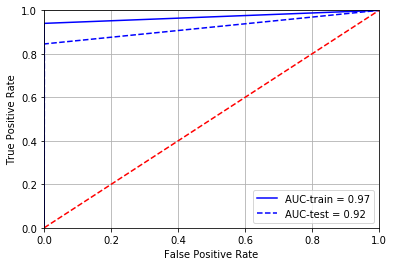

Metrics for predicting analyte 2 : accuracy=0.992, F1-score=0.837, Precision=0.972, auc=0.867


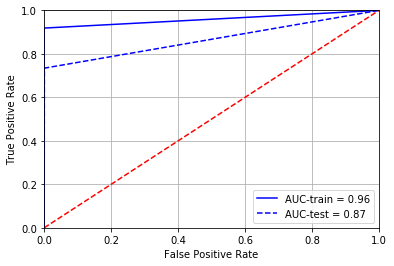

Metrics for predicting analyte 3 : accuracy=0.994, F1-score=0.869, Precision=0.959, auc=0.897


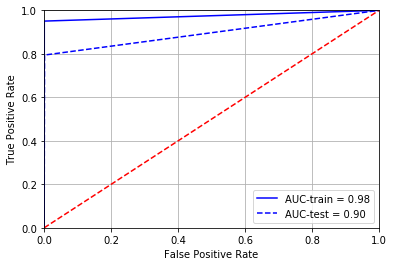

Metrics for predicting analyte 4 : accuracy=0.993, F1-score=0.840, Precision=0.911, auc=0.888


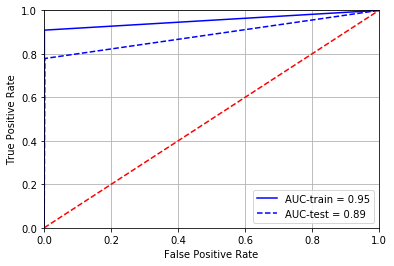

Metrics for predicting analyte 5 : accuracy=0.995, F1-score=0.893, Precision=0.960, auc=0.917


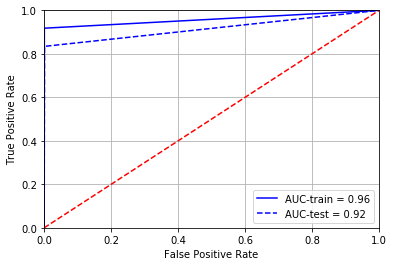

Metrics for predicting analyte 6 : accuracy=0.992, F1-score=0.835, Precision=0.919, auc=0.882


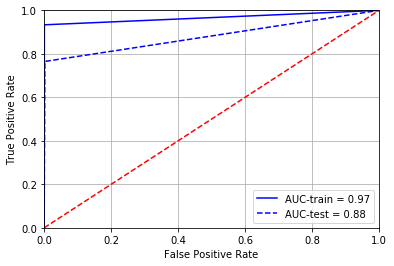

Metrics for predicting analyte 7 : accuracy=0.991, F1-score=0.805, Precision=0.876, auc=0.871


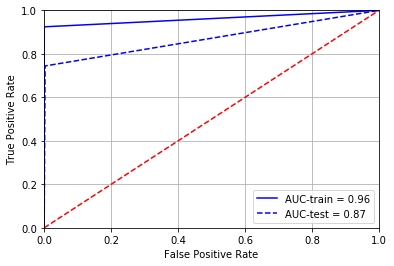

Metrics for predicting analyte 8 : accuracy=0.994, F1-score=0.856, Precision=0.925, auc=0.898


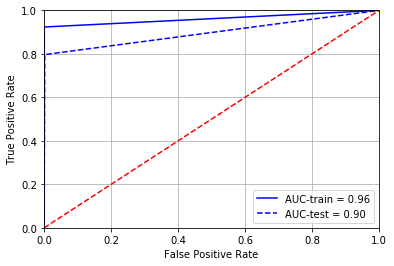

Metrics for predicting analyte 9 : accuracy=0.991, F1-score=0.805, Precision=0.769, auc=0.919


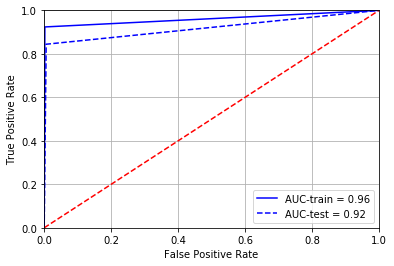

Metrics for predicting analyte 10 : accuracy=0.996, F1-score=0.899, Precision=0.947, auc=0.927


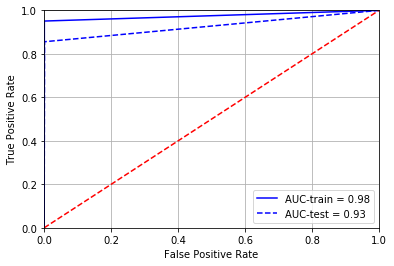

Metrics for predicting analyte 11 : accuracy=0.996, F1-score=0.919, Precision=0.926, auc=0.955


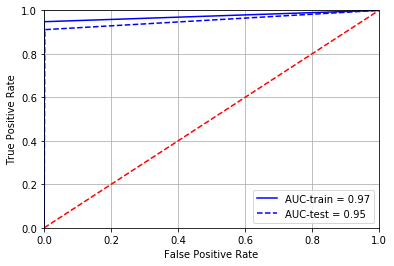

Metrics for predicting analyte 12 : accuracy=0.986, F1-score=0.727, Precision=0.729, auc=0.859


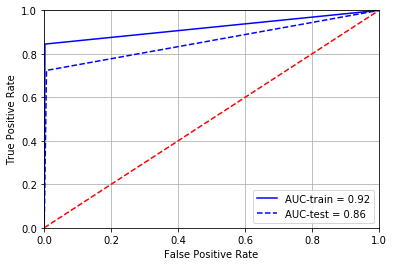

Metrics for predicting analyte 13 : accuracy=0.983, F1-score=0.652, Precision=0.642, auc=0.826


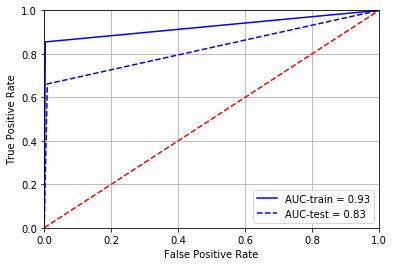

Metrics for predicting analyte 14 : accuracy=0.994, F1-score=0.862, Precision=0.838, auc=0.941


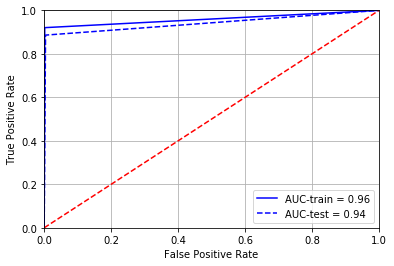

Metrics for predicting analyte 15 : accuracy=0.990, F1-score=0.774, Precision=0.821, auc=0.864


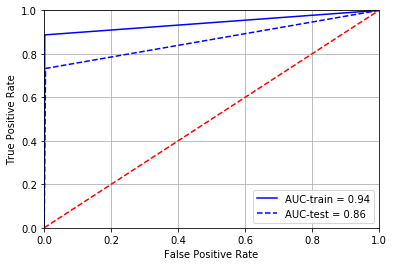

Metrics for predicting analyte 16 : accuracy=0.989, F1-score=0.775, Precision=0.840, auc=0.858


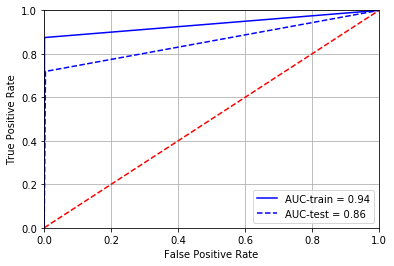

Metrics for predicting analyte 17 : accuracy=0.990, F1-score=0.800, Precision=0.885, auc=0.864


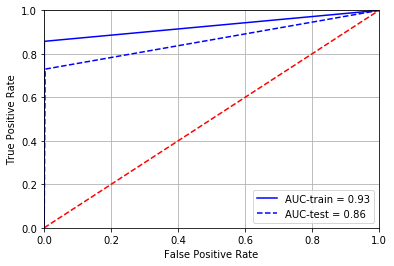

Metrics for predicting analyte 18 : accuracy=0.984, F1-score=0.618, Precision=0.742, auc=0.762


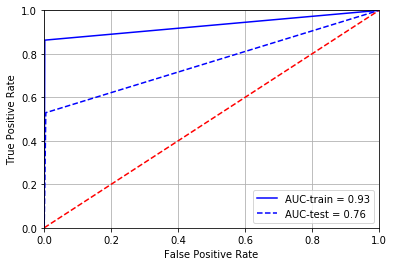

Metrics for predicting analyte 19 : accuracy=0.993, F1-score=0.851, Precision=0.888, auc=0.907


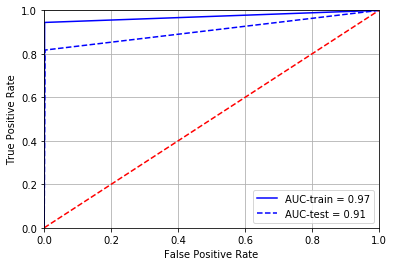

Metrics for predicting analyte 20 : accuracy=0.986, F1-score=0.722, Precision=0.719, auc=0.859


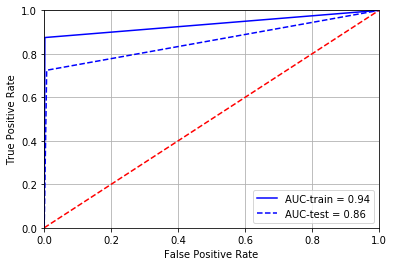

Metrics for predicting analyte 21 : accuracy=0.998, F1-score=0.956, Precision=0.992, auc=0.961


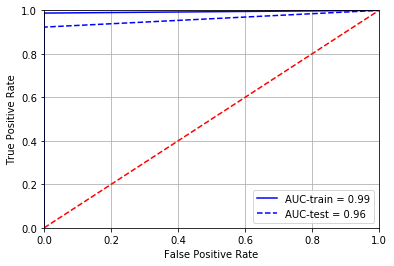

Metrics for predicting analyte 22 : accuracy=0.997, F1-score=0.927, Precision=0.991, auc=0.936


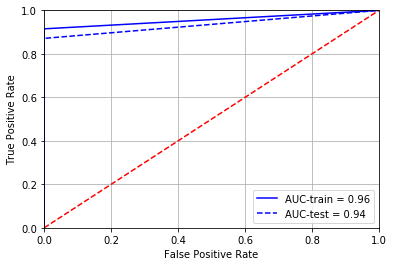

Metrics for predicting analyte 23 : accuracy=0.996, F1-score=0.912, Precision=0.991, auc=0.922


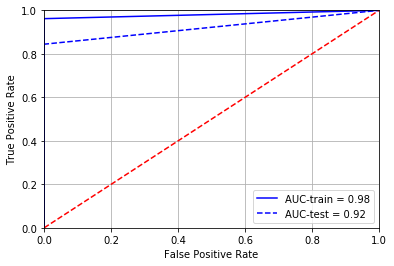

Metrics for predicting analyte 24 : accuracy=0.982, F1-score=0.602, Precision=0.638, auc=0.781


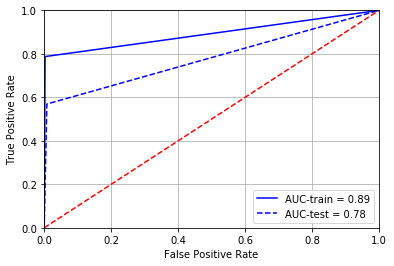

Metrics for predicting analyte 25 : accuracy=0.986, F1-score=0.714, Precision=0.785, auc=0.825


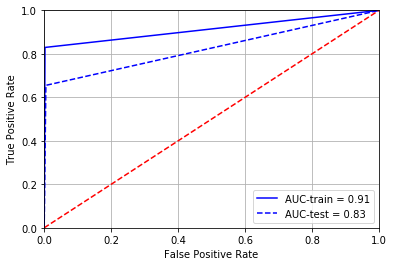

Metrics for predicting analyte 26 : accuracy=0.993, F1-score=0.854, Precision=0.908, auc=0.902


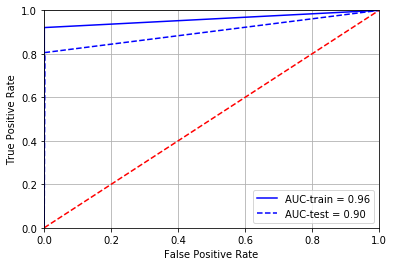

Metrics for predicting analyte 27 : accuracy=0.993, F1-score=0.828, Precision=0.889, auc=0.886


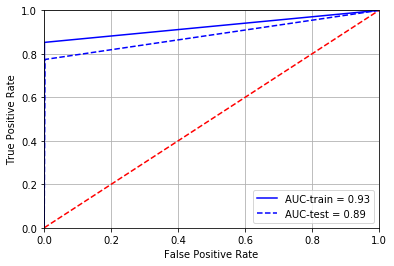

Metrics for predicting analyte 28 : accuracy=0.994, F1-score=0.863, Precision=0.942, auc=0.898


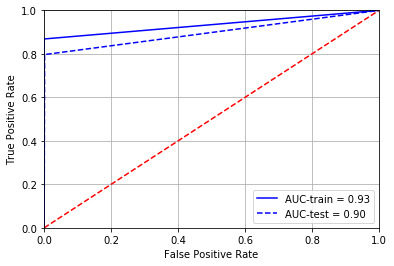

Metrics for predicting analyte 29 : accuracy=0.997, F1-score=0.944, Precision=1.000, auc=0.947


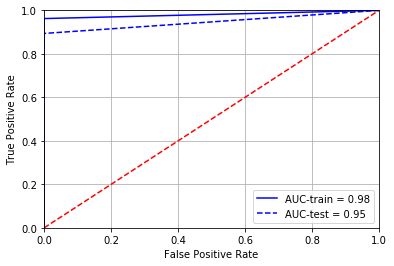

Metrics for predicting analyte 30 : accuracy=0.989, F1-score=0.780, Precision=0.871, auc=0.852


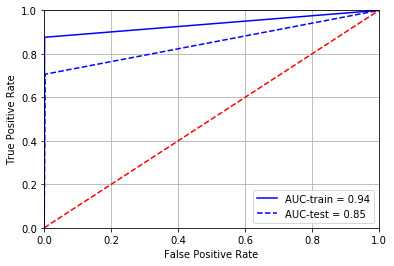

Metrics for predicting analyte 31 : accuracy=0.988, F1-score=0.776, Precision=0.786, auc=0.880


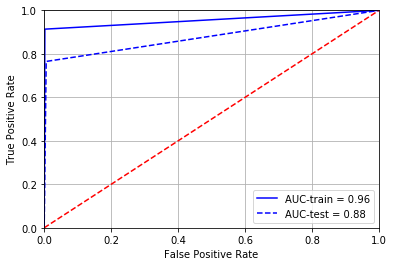

Metrics for predicting analyte 32 : accuracy=0.993, F1-score=0.846, Precision=0.892, auc=0.901


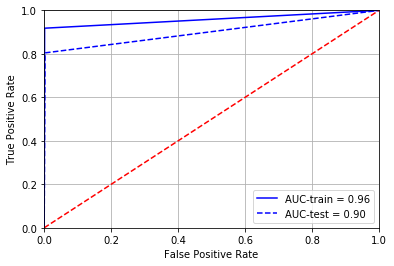

Metrics for predicting analyte 33 : accuracy=0.992, F1-score=0.852, Precision=0.924, auc=0.894


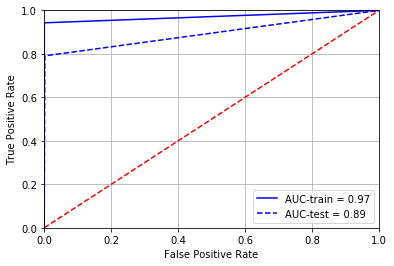

Metrics for predicting analyte 34 : accuracy=0.979, F1-score=0.601, Precision=0.659, auc=0.772


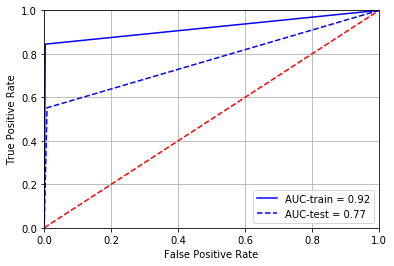

Metrics for predicting analyte 35 : accuracy=0.993, F1-score=0.843, Precision=0.946, auc=0.880


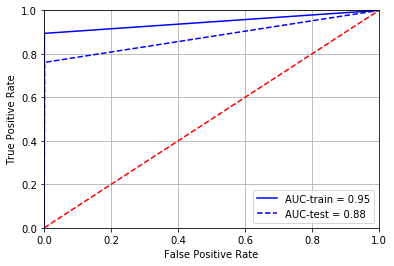

Metrics for predicting analyte 36 : accuracy=0.991, F1-score=0.813, Precision=0.887, auc=0.874


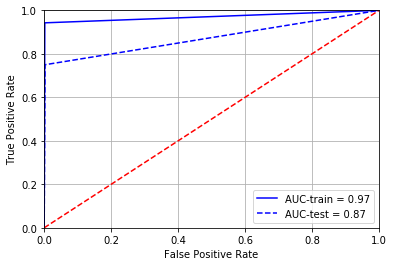

Metrics for predicting analyte 37 : accuracy=0.989, F1-score=0.773, Precision=0.792, auc=0.875


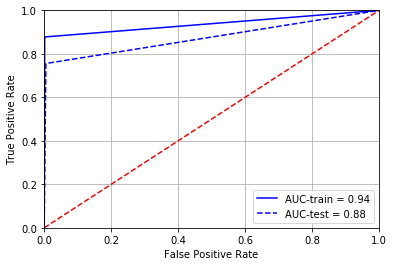

Metrics for predicting analyte 38 : accuracy=0.995, F1-score=0.877, Precision=1.000, auc=0.891


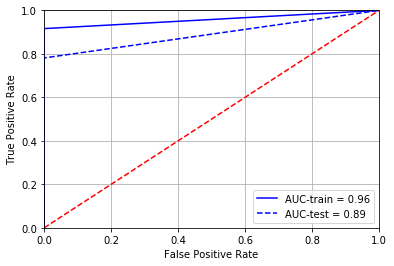

Metrics for predicting analyte 39 : accuracy=0.994, F1-score=0.869, Precision=0.965, auc=0.895


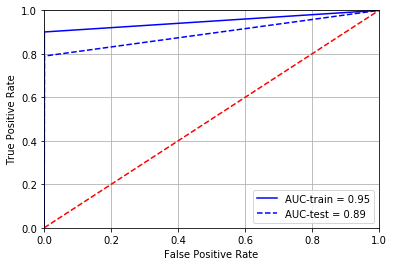

Metrics for predicting analyte 40 : accuracy=0.993, F1-score=0.847, Precision=0.926, auc=0.890


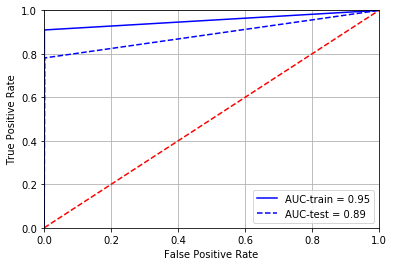

In [62]:
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0
    yclass[yclass==j]=1
    X_train, X_test, yclass_train, yclass_test = train_test_split(dfset1,yclass,test_size=0.3,random_state=0)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, yclass_train) 
    predictions = neigh.predict(X_test)
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f, auc=%.3f" %(j, neigh.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions),roc_auc_score(yclass_test,predictions)))
    plot_roc(X_train,X_test,yclass_train,yclass_test)

#### The F1-score is above .90 for six  analytes and,  between .80-.90 for 22 analytes .  The analytes 13(0.652),18(0.618),24(0.602) and 34(0.601) have the lowest F1-score. Also, they have the lowest auc.

### 7. Applying knn with k=3  and two classes: Analyte j (j=1,,..40) versus other analytes (class=0)) but using only 50 PC's

Metrics for predicting analyte 1 : accuracy=0.999, F1-score=0.986, Precision=0.993, auc=0.990


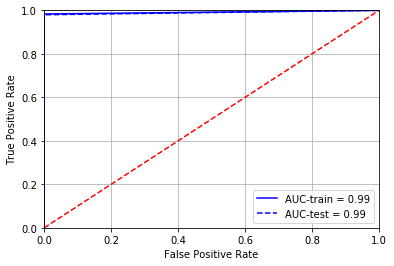

Metrics for predicting analyte 2 : accuracy=0.996, F1-score=0.921, Precision=1.000, auc=0.927


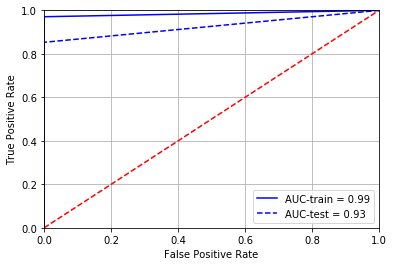

Metrics for predicting analyte 3 : accuracy=0.997, F1-score=0.939, Precision=0.985, auc=0.948


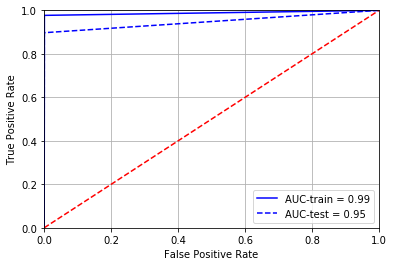

Metrics for predicting analyte 4 : accuracy=0.996, F1-score=0.916, Precision=0.916, auc=0.957


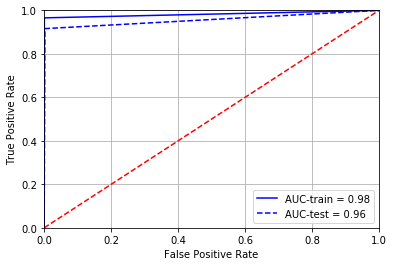

Metrics for predicting analyte 5 : accuracy=0.996, F1-score=0.932, Precision=0.963, auc=0.951


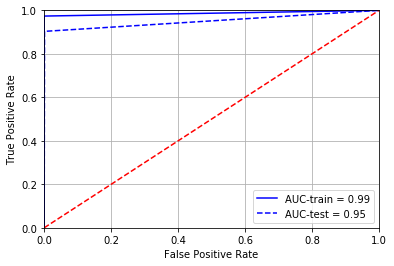

Metrics for predicting analyte 6 : accuracy=0.997, F1-score=0.948, Precision=0.979, auc=0.959


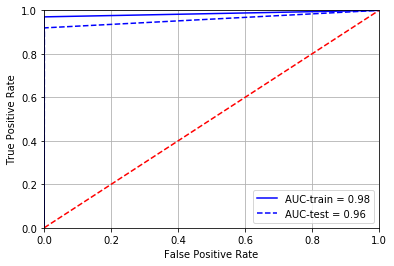

Metrics for predicting analyte 7 : accuracy=0.997, F1-score=0.945, Precision=0.984, auc=0.955


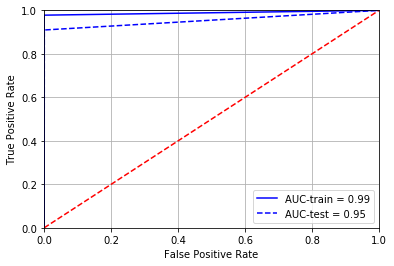

Metrics for predicting analyte 8 : accuracy=0.997, F1-score=0.923, Precision=0.973, auc=0.939


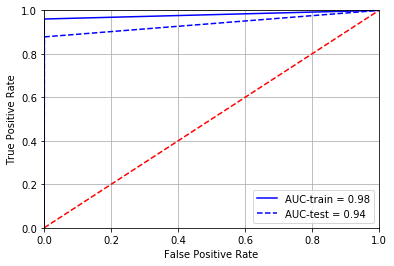

Metrics for predicting analyte 9 : accuracy=0.996, F1-score=0.912, Precision=0.891, auc=0.966


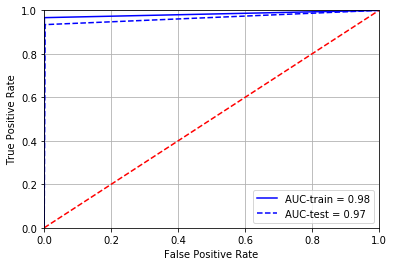

Metrics for predicting analyte 10 : accuracy=0.999, F1-score=0.981, Precision=0.981, auc=0.990


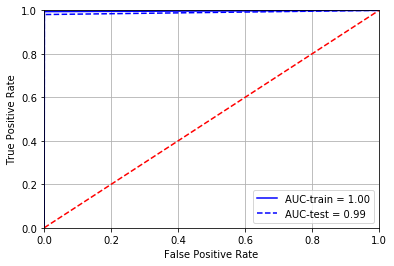

Metrics for predicting analyte 11 : accuracy=0.999, F1-score=0.976, Precision=0.984, auc=0.984


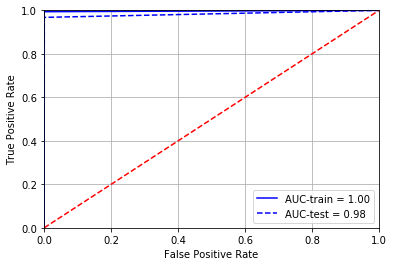

Metrics for predicting analyte 12 : accuracy=0.995, F1-score=0.888, Precision=0.920, auc=0.928


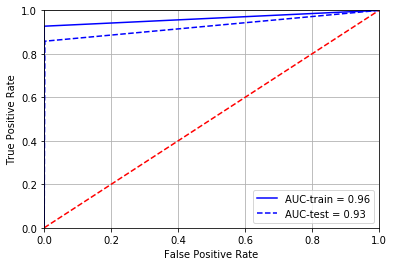

Metrics for predicting analyte 13 : accuracy=0.988, F1-score=0.757, Precision=0.741, auc=0.884


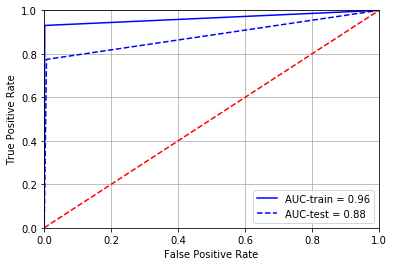

Metrics for predicting analyte 14 : accuracy=0.996, F1-score=0.927, Precision=0.882, auc=0.986


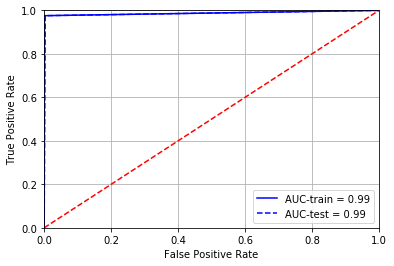

Metrics for predicting analyte 15 : accuracy=0.994, F1-score=0.878, Precision=0.878, auc=0.937


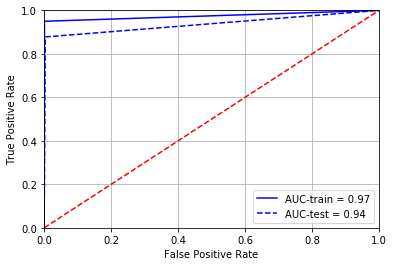

Metrics for predicting analyte 16 : accuracy=0.994, F1-score=0.890, Precision=0.896, auc=0.940


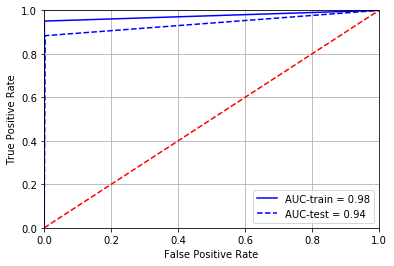

Metrics for predicting analyte 17 : accuracy=0.996, F1-score=0.934, Precision=0.964, auc=0.952


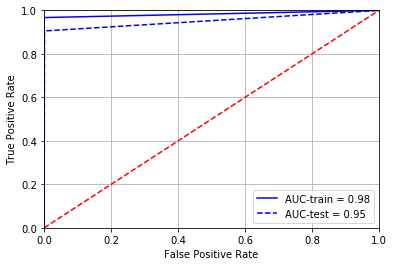

Metrics for predicting analyte 18 : accuracy=0.991, F1-score=0.820, Precision=0.875, auc=0.885


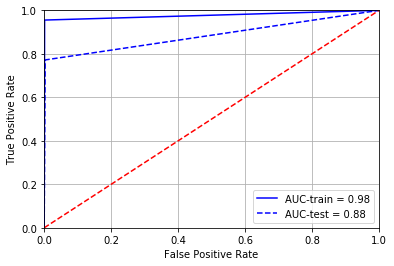

Metrics for predicting analyte 19 : accuracy=0.997, F1-score=0.941, Precision=0.937, auc=0.971


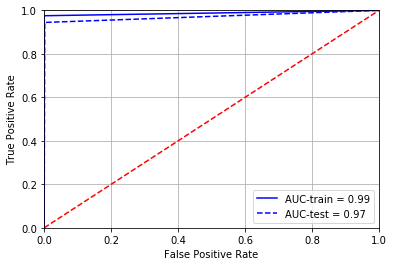

Metrics for predicting analyte 20 : accuracy=0.991, F1-score=0.833, Precision=0.818, auc=0.921


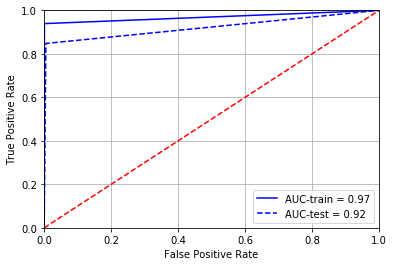

Metrics for predicting analyte 21 : accuracy=0.999, F1-score=0.984, Precision=0.992, auc=0.988


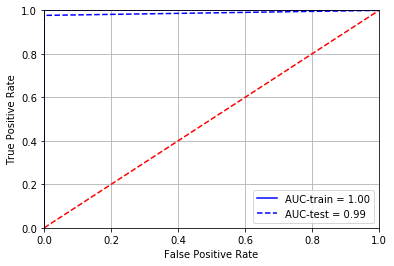

Metrics for predicting analyte 22 : accuracy=0.999, F1-score=0.981, Precision=1.000, auc=0.981


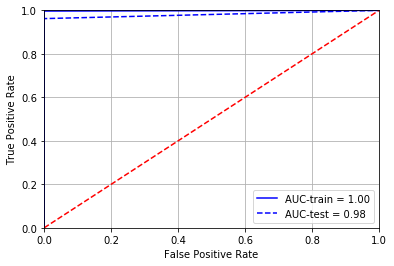

Metrics for predicting analyte 23 : accuracy=0.999, F1-score=0.973, Precision=1.000, auc=0.974


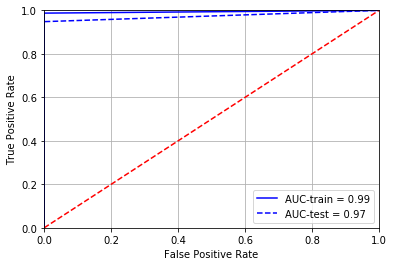

Metrics for predicting analyte 24 : accuracy=0.989, F1-score=0.777, Precision=0.777, auc=0.886


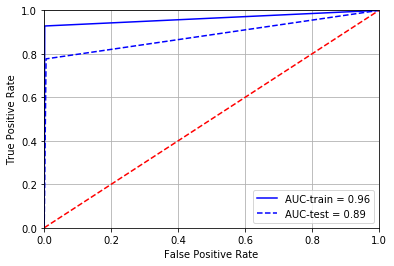

Metrics for predicting analyte 25 : accuracy=0.992, F1-score=0.853, Precision=0.888, auc=0.909


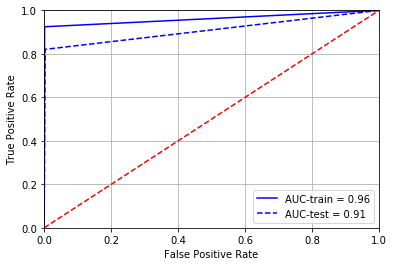

Metrics for predicting analyte 26 : accuracy=0.998, F1-score=0.959, Precision=0.949, auc=0.984


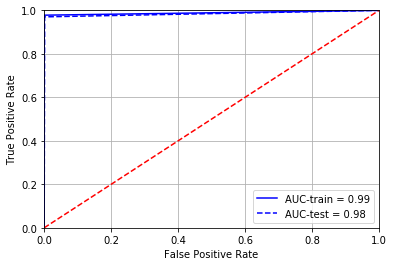

Metrics for predicting analyte 27 : accuracy=0.995, F1-score=0.896, Precision=0.923, auc=0.935


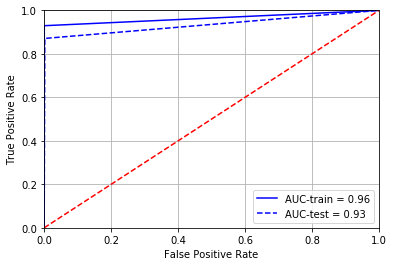

Metrics for predicting analyte 28 : accuracy=0.998, F1-score=0.951, Precision=0.959, auc=0.971


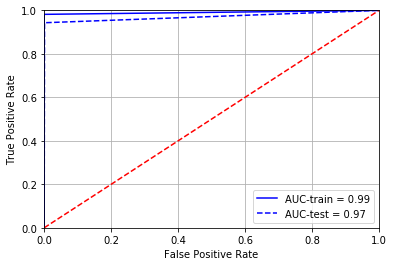

Metrics for predicting analyte 29 : accuracy=0.999, F1-score=0.977, Precision=1.000, auc=0.977


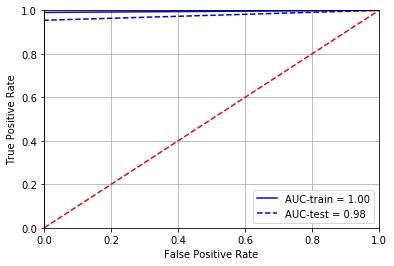

Metrics for predicting analyte 30 : accuracy=0.995, F1-score=0.903, Precision=0.933, auc=0.936


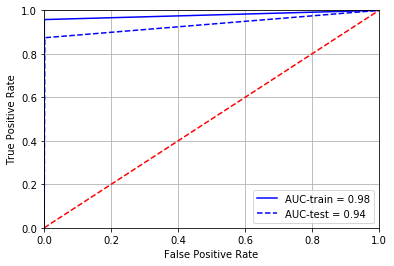

Metrics for predicting analyte 31 : accuracy=0.994, F1-score=0.887, Precision=0.881, auc=0.945


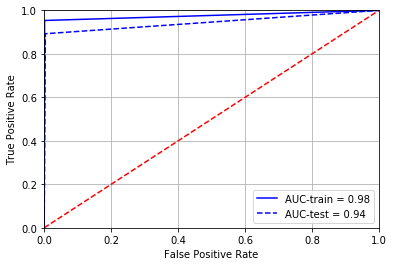

Metrics for predicting analyte 32 : accuracy=0.996, F1-score=0.918, Precision=0.959, auc=0.939


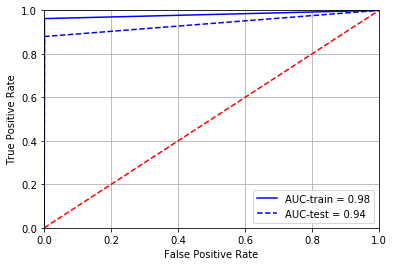

Metrics for predicting analyte 33 : accuracy=0.997, F1-score=0.953, Precision=0.986, auc=0.961


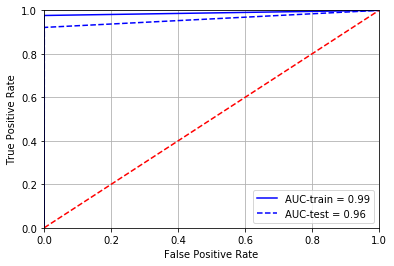

Metrics for predicting analyte 34 : accuracy=0.987, F1-score=0.760, Precision=0.804, auc=0.858


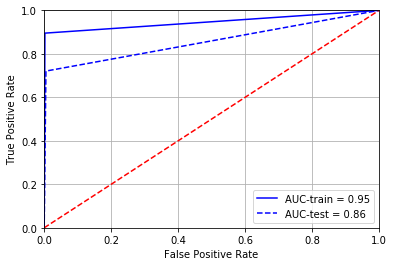

Metrics for predicting analyte 35 : accuracy=0.997, F1-score=0.944, Precision=0.969, auc=0.960


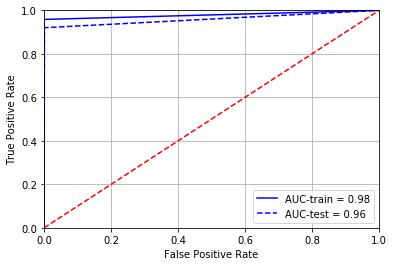

Metrics for predicting analyte 36 : accuracy=0.995, F1-score=0.900, Precision=0.944, auc=0.929


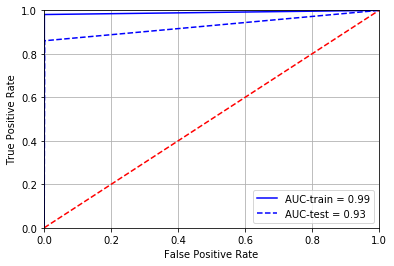

Metrics for predicting analyte 37 : accuracy=0.995, F1-score=0.896, Precision=0.906, auc=0.942


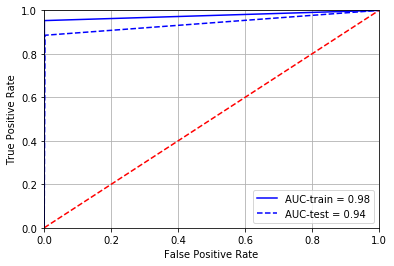

Metrics for predicting analyte 38 : accuracy=0.997, F1-score=0.934, Precision=0.991, auc=0.941


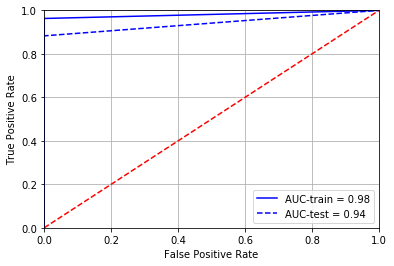

Metrics for predicting analyte 39 : accuracy=0.998, F1-score=0.951, Precision=0.984, auc=0.960


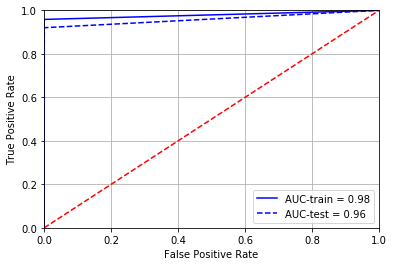

Metrics for predicting analyte 40 : accuracy=0.997, F1-score=0.941, Precision=0.945, auc=0.968


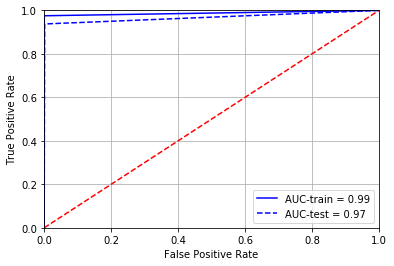

In [63]:
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0
    yclass[yclass==j]=1
    X_train, X_test, yclass_train, yclass_test = train_test_split(pca_result,yclass,test_size=0.3,random_state=0)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, yclass_train) 
    predictions = neigh.predict(X_test)
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f, auc=%.3f" %(j, neigh.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions),roc_auc_score(yclass_test,predictions)))
    plot_roc(X_train,X_test,yclass_train,yclass_test)

#### The prediction results improve. Now, the F1-score is above .90 for twenty-eight analytes and, between .80-.90 for nine analytes . The analytes 13(0.757), 24(0.602) and 34(0.760) have the lowest F1-score. Also, they have the lowest auc.